# Exercise 1:

1. Compute the Maclaurin series of $1/(1+x)$ and $1/(1-x)$.
2. Hence, or otherwise, compute the series for $x/(1-x^2)$.
3. Repeat 1. and 2. but now finding the Taylor series for when $x_0=2$.

### Solution 1

Let $g(x)=1/(1+x)$. Differentiating this a few times we see:

\begin{equation*}
\begin{array}{lllll}
  g'(x)&=-1/(1+x)^2 &\quad & g''(x)&=2/(1+x)^3\\
  g'''(x)&=-6/(1+x)^4 && g^{(n)}(x)&=(-1)^n n!/(1+x)^{n+1}\\
\end{array}
\end{equation*}

Similarly, letting $h(x)=1/(1-x)$ we get

\begin{equation*}
\begin{array}{lllll}
  h'(x)&=1/(1-x)^2 &\quad & h''(x)&=2/(1-x)^3\\
  h'''(x)&=6/(1-x)^4 && h^{(n)}(x)&=n!/(1-x)^{n+1}\\
\end{array}
\end{equation*}

When the expansion point $x_0=0$

\begin{equation*}
\begin{array}{lllll}
  g(0)&=1 &\quad & h(0)&=1\\
  g'(0)&=-1 &\quad & h'(0)&=1\\
  g''(0)&=2 &\quad & h''(0)&=2\\
  g'''(0)&=-6 &\quad & h'''(0)&=6\\
  g^{(n)}(0)&=(-1)^n n! &\quad & h^{(n)}(0)&=n!\\
\end{array}
\end{equation*}

\begin{equation*}
 g(x)=1-x+x^2-x^3+x^4+...,
\end{equation*}

\begin{equation*}
 h(x)=1+x+x^2+x^3+x^4+....
\end{equation*}

### Solution 2

First, to make our lives easier lets split up our function as:

\begin{equation*}
 f(x)=\frac{x}{1-x^2}=\frac{x}{(1+x)(1-x)}=\frac{x}{2}\left(\frac{1}{1+x}+\frac{1}{1-x}\right).
\end{equation*}

and hence

\begin{equation*}
 f(x)=\frac{x}{2}\left(g(x)+h(x)\right),
\end{equation*}

and plugging in the above two 'sub-expansions' from 1. we get:

\begin{equation*}
 f(x)=\frac{x}{2}\left(1-x+x^2-x^3+x^4+... + 1+x+x^2+x^3+x^4+...\right)=\frac{x}{2}\left(2\sum_{n=0}^{\infty}x^{2n}\right)=\sum_{n=0}^{\infty}x^{2n+1}
\end{equation*}

### Solution 3

Plugging $x_0=2$ in to $g(x)$, $h(x)$ and their derivatives we get

\begin{equation*}
\begin{array}{lllll}
  g(2)&=1/3 &\quad & h(2)&=-1\\
  g'(2)&=-1/9 &\quad & h'(2)&=1\\
  g''(2)&=2/27 &\quad & h''(2)&=-2\\
  g'''(2)&=-6/81 &\quad & h'''(2)&=6\\
  g^{(n)}(2)&=(-1)^n n!/3^{n+1} &\quad & h^{(n)}(2)&=(-1)^{n+1}n!\\
\end{array}
\end{equation*}

\begin{equation*}
 g(x)=\frac{1}{3}-\frac{1}{9}(x-2)+\frac{1}{27}(x-2)^2-\frac{1}{81}(x-2)^3+...,
\end{equation*}

\begin{equation*}
 h(x)=-1+(x-2)-(x-2)^2+(x-2)^3+....
\end{equation*}

Combining our series, the expansion for $f(x)$ about $x_0=2$ can be written as

\begin{equation*}
 f(x)=\frac{x}{2}\left(\sum_{n=0}^{\infty}\frac{(-1)^n}{3^{n+1}}(x-2)^{n}+\sum_{n=0}^{\infty}(-1)^{n+1}(x-2)^{n}\right)
\end{equation*}

### A note on the radii of convergence

Recall that the *Radius of convergence* is defined as

\begin{equation*}
  R\equiv \lim_{n\rightarrow\infty}\left|\frac{a_{n}}{a_{n+1}}\right|
\end{equation*}

and based on the value of $R$ we can expect our series expansion to converge between:

\begin{equation*}
  x_0-R < x_0 < x_0+R.
\end{equation*}

**$x_0=0$**:

For each of our expansions $g(x)$ and $h(x)$ $R=1$ (since $|a_n|=1$ for all $n$). Hence the radius of convergence for $f(x)$ will also be 1. We therefore expect out expansion to converge between $-1$ and $1$.

**$x_0=2$**:

I'll leave this case to you for the time being.

Let us however explore the expansion vs. the true function in the two cases above:

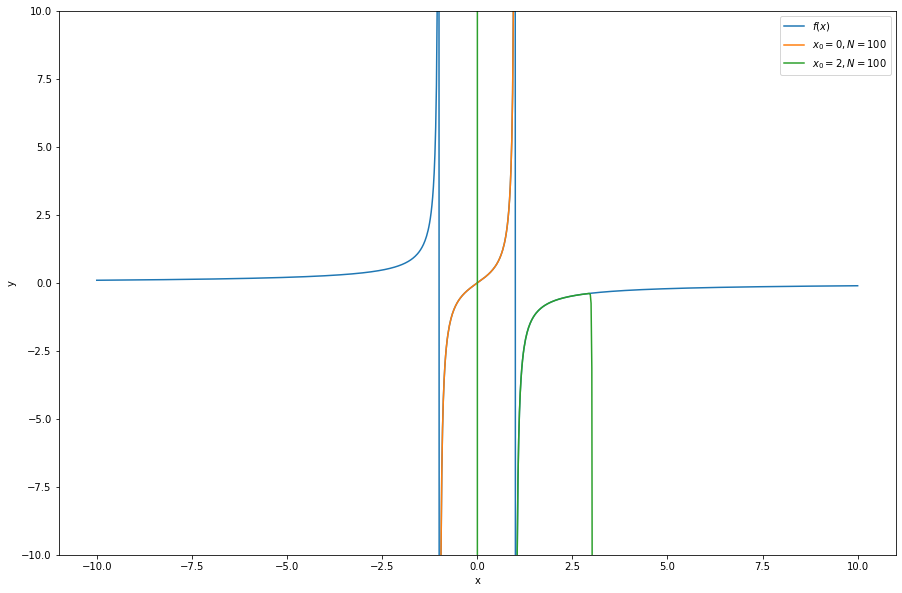

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-10,10,N)

def eval_f(x):
    return x/(1-x**2)

def eval_fe0(x, N):
    e = 0
    for i in range(N):
        e+=x**(2*i+1)
    return e

def eval_fe2(x, N):
    e = 0
    for i in range(N+1):
        e+=(-1)**i/3**(i+1)*(x-2)**i+(-1)**(i+1)*(x-2)**i
    e = e*x/2
    return e

y1 = eval_f(x)
y2 = eval_fe0(x, 100)
y3 = eval_fe2(x, 100)

plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(x, y1, label = "$f(x)$")
plt.plot(x, y2, label = "$x_0=0, N=100$")
plt.plot(x, y3, label = "$x_0=2, N=100$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-10, 10))
plt.legend()
plt.show()

We see that our expansion about $x_0=0$ is performing well between roughly -1 and 1 and our expansion about $x_0=2$ between roughly 1 and 3. Note, that if we look at our expansions about $x_0=2$ individually we see the following:

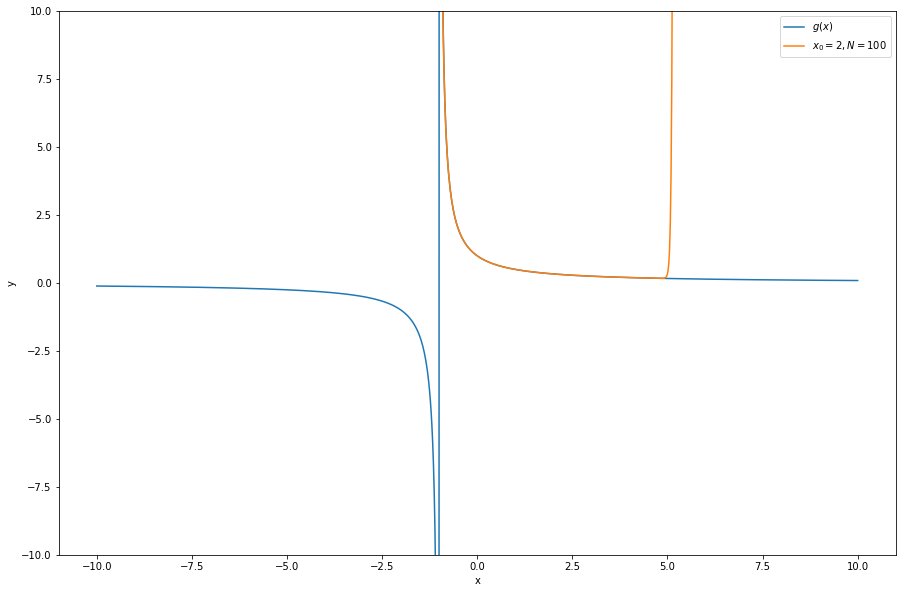

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-10,10,N)

def eval_g(x):
    return 1/(1+x)

def eval_ge2(x, N):
    e = 0
    for i in range(N+1):
        e+=(-1)**i/3**(i+1)*(x-2)**i
    return e

y1 = eval_g(x)
y2 = eval_ge2(x, 100)

plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(x, y1, label = "$g(x)$")
plt.plot(x, y2, label = "$x_0=2, N=100$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-10, 10))
plt.legend()
plt.show()

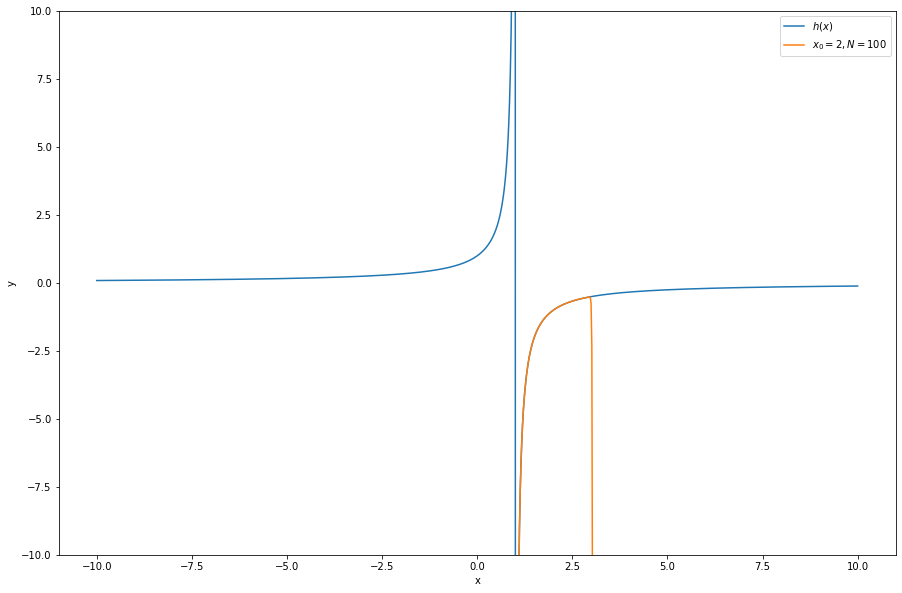

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-10,10,N)

def eval_h(x):
    return 1/(1-x)

def eval_he2(x, N):
    e = 0
    for i in range(N+1):
        e+=(-1)**(i+1)*(x-2)**i
    return e

y1 = eval_h(x)
y2 = eval_he2(x, 100)

plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(x, y1, label = "$h(x)$")
plt.plot(x, y2, label = "$x_0=2, N=100$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-10, 10))
plt.legend()
plt.show()